# Final Project: ECG & Temperature BLE Device

## Battery Voltage Measurement

Verify the accuracy of your battery level measurement (`AIN0`) for 0-3.7 V, as read through the nRF Connect app Bluetooth Battery Level GATT.  Quantitative analysis should include:
  * Linear regression analysis of the input voltage versus the battery level for both the `LOG_INF()` output, the oscilloscope measurement of the PWM duty cycle, and the nRF Connect app.
  * 95% confidence intervals for the slope and intercept of the linear regression.


Analysis for Battery Level (LOG_INF %):
  Slope: 26.74454828660437
  Intercept: -1.0965732087227469
  95% Confidence Interval for Slope: 0    25.811249
1    27.677848
Name: Voltage (V), dtype: float64

Analysis for Oscilloscope Voltage (V):
  Slope: 0.9984356920338232
  Intercept: -0.0015983533600356925
  95% Confidence Interval for Slope: 0    0.994217
1    1.002654
Name: Voltage (V), dtype: float64


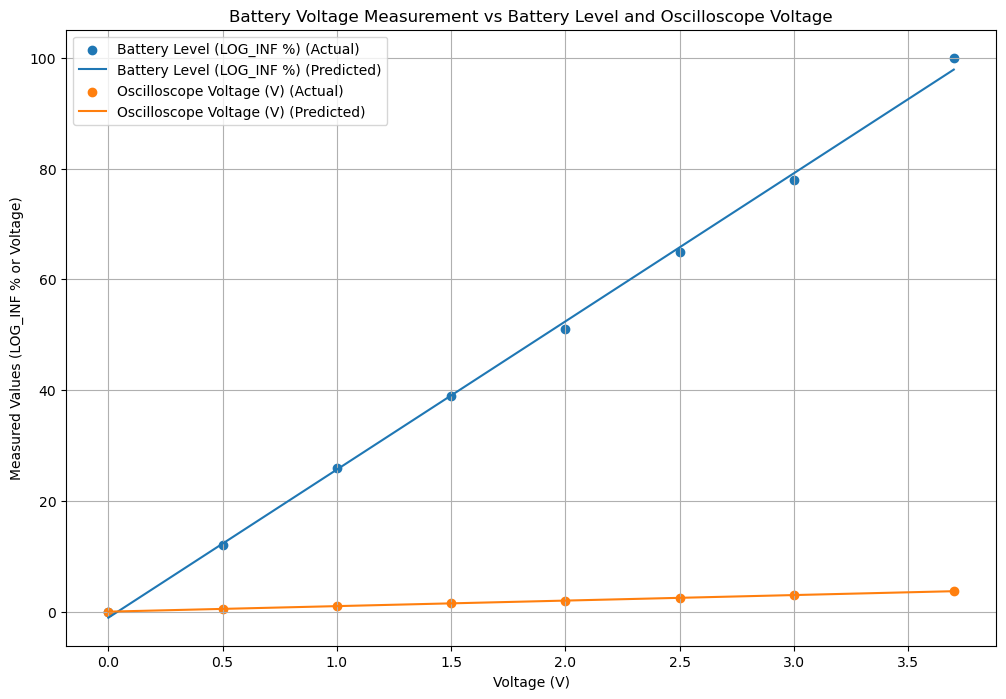


 Data Points:
   Voltage (V)  Battery Level (LOG_INF %)  Oscilloscope Voltage (V)  \
0          0.0                          0                     0.000   
1          0.5                         12                     0.499   
2          1.0                         26                     0.999   
3          1.5                         39                     1.487   
4          2.0                         51                     2.001   
5          2.5                         65                     2.487   
6          3.0                         78                     2.998   
7          3.7                        100                     3.694   

   Battery Level (LOG_INF %) (Predicted)  \
0                              -1.096573   
1                              12.275701   
2                              25.647975   
3                              39.020249   
4                              52.392523   
5                              65.764798   
6                              79.137

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Voltage data
data = {
    'Voltage (V)': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.7],
    'Battery Level (LOG_INF %)': [0, 12, 26, 39, 51, 65, 78, 100],
    'Oscilloscope Voltage (V)': [0.0, 0.499, 0.999, 1.487, 2.001, 2.487, 2.998, 3.694]  
}

#  DataFrame
df = pd.DataFrame(data)

# Perform linear regression for each data source
results = {}
for column in data.keys():
    if column != 'Voltage (V)':
        X = sm.add_constant(df['Voltage (V)'])  # Add constant term
        y = df[column]
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X)
        
        # Add predicted values and residuals to DataFrame
        df[f'{column} (Predicted)'] = predictions
        df[f'{column} (Residuals)'] = y - predictions
        df[f'{column} (Error %)'] = ((y - predictions) / y) * 100
        
        # Store results
        results[column] = {
            'slope': model.params.iloc[1],  # Use .iloc for positional indexing
            'intercept': model.params.iloc[0],  # Use .iloc for positional indexing
            'conf_interval': model.conf_int(alpha=0.05).iloc[1],
            'model': model
        }

# Display linear regression results
for key, value in results.items():
    print(f"\nAnalysis for {key}:")
    print(f"  Slope: {value['slope']}")
    print(f"  Intercept: {value['intercept']}")
    print(f"  95% Confidence Interval for Slope: {value['conf_interval']}")

# Plotting
plt.figure(figsize=(12, 8))
for column in data.keys():
    if column != 'Voltage (V)':
        plt.scatter(df['Voltage (V)'], df[column], label=f'{column} (Actual)')
        plt.plot(df['Voltage (V)'], df[f'{column} (Predicted)'], label=f'{column} (Predicted)')

plt.title('Battery Voltage Measurement vs Battery Level and Oscilloscope Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Measured Values (LOG_INF % or Voltage)')
plt.legend()
plt.grid()
plt.show()

# Display the DataFrame
print("\n Data Points:")
print(df)


## Temperature Sensor Measurment

Demonstrate that your temperature sensor can have a room temperature measurement read through `LOG_INF()` output and the nRF Connect app.  Do this in 3 locations with different temperatures.  You do not need to verify accuracy, just a reasonable measurements with agreement.

Temperature Sensor Measurements:
  Location  Temperature (°C)
0      Lab                21
1     Home                23
2   Home-2                26


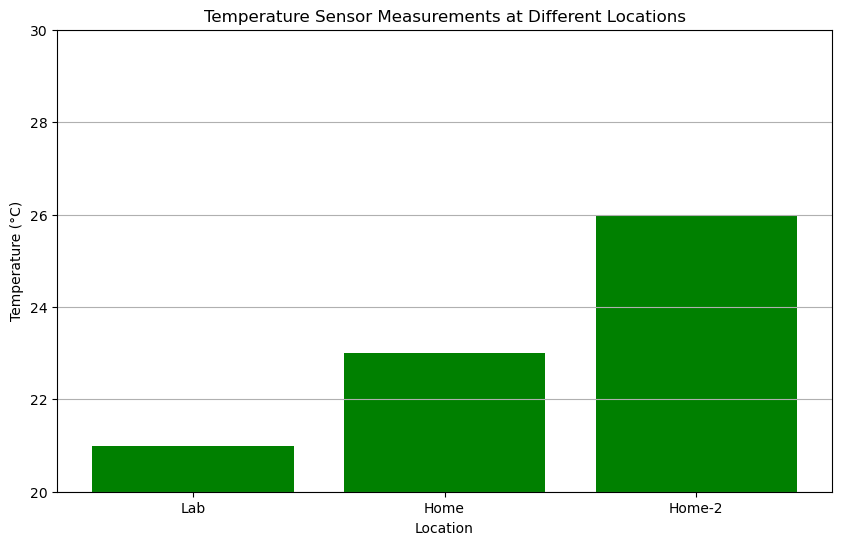

In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Temperature readings at three locations
data = {
    'Location': ['Lab', 'Home', 'Home-2'],
    'Temperature (°C)': [21, 23, 26]
}

#  DataFrame
df = pd.DataFrame(data)

#  DataFrame to show the measurements
print("Temperature Sensor Measurements:")
print(df)

# Plotting the temperature measurements
plt.figure(figsize=(10, 6))
plt.bar(df['Location'], df['Temperature (°C)'], color='green')
plt.title('Temperature Sensor Measurements at Different Locations')
plt.xlabel('Location')
plt.ylabel('Temperature (°C)')
plt.ylim(20, 30)  
plt.grid(axis='y')
plt.show()

## ECG Heart Rate Measurement
Demonstrate that your average heart rate measurement is accurate, as recorded through `LOG_INF()` output, the oscilloscope measurements, and the nRF Connect app, relative to what was set on the function generator.  This should be done for 40, 60, 120, 150, and 180 bpm.  The 25% duty cycle should also be verified. Quantitative analysis should include:
  * Linear regression analysis of the recorded heart rate versus the set heart rate for both the `LOG_INF()` output, oscilloscope measurements, and the nRF Connect app.
  * 95% confidence intervals for the slope and intercept of the linear regression.
  * Verification that the duty cycle of out output is 25% for all heart rates.

In [ ]:
# ECG HR Analysis Here